## Visualize the samples

In [6]:
%matplotlib inline


Visualizing 10 random samples from directory: D:\Grand\5\train_PS05\train...


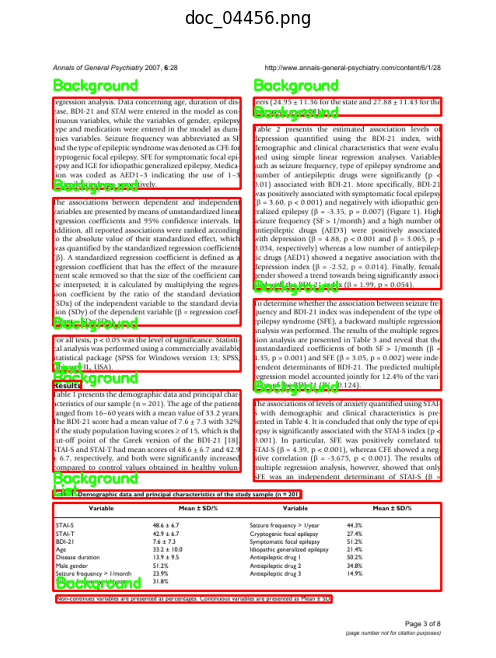

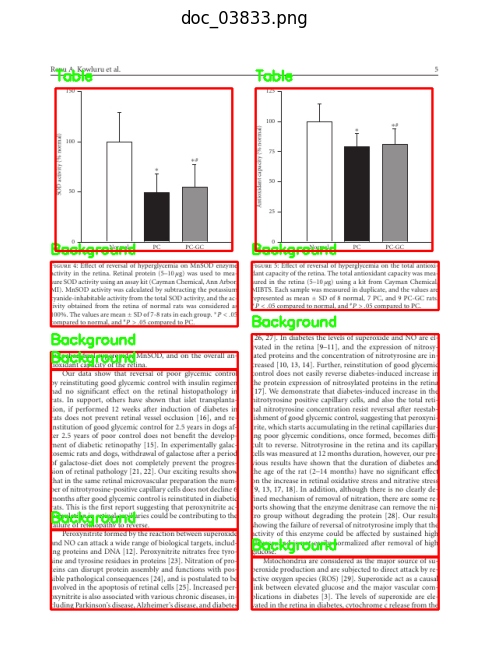

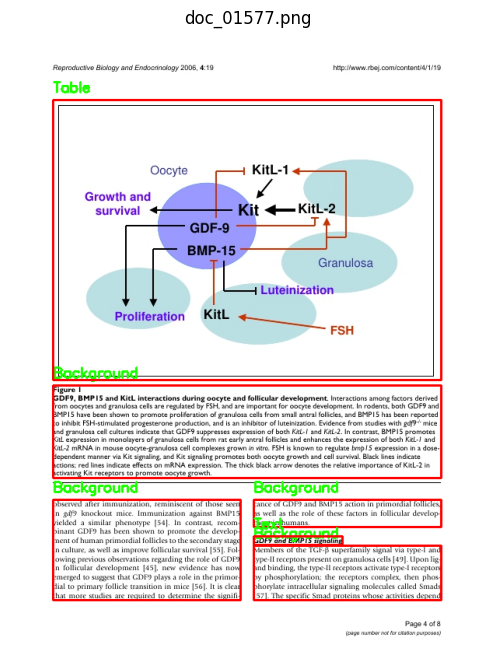

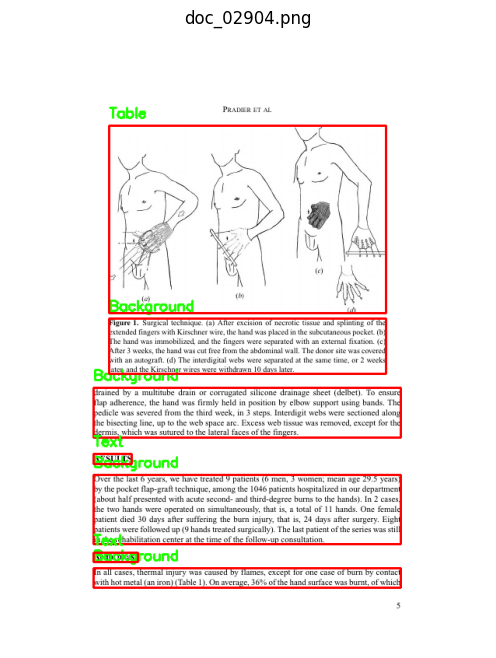

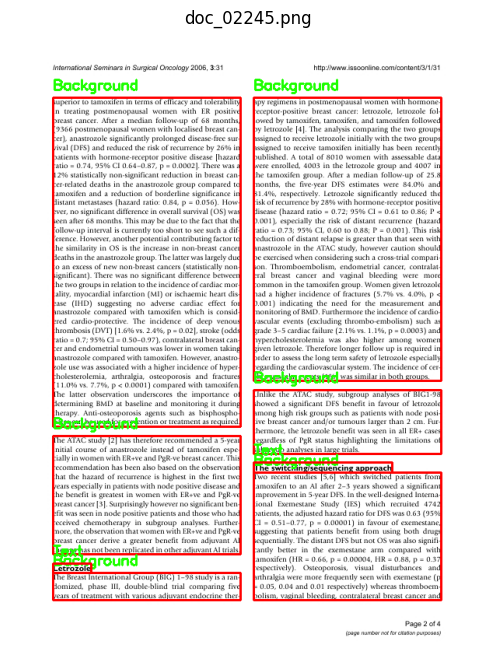

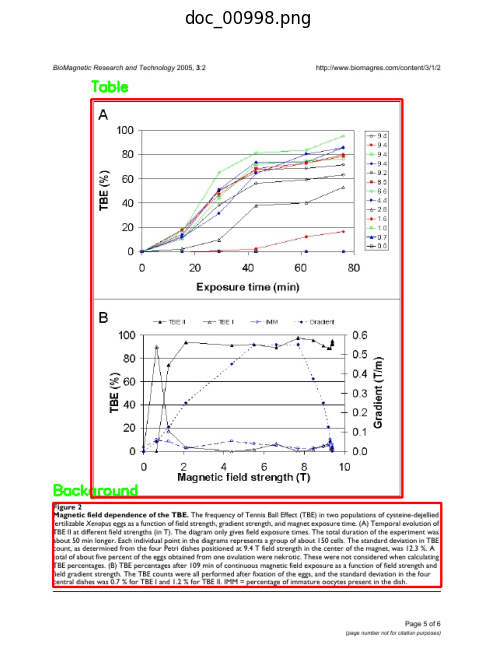

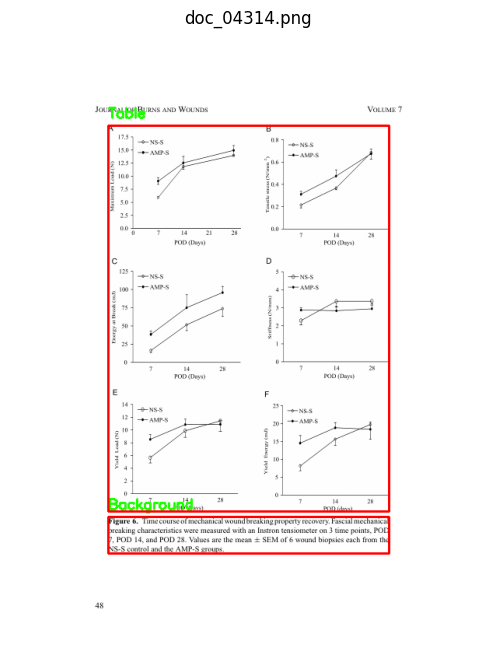

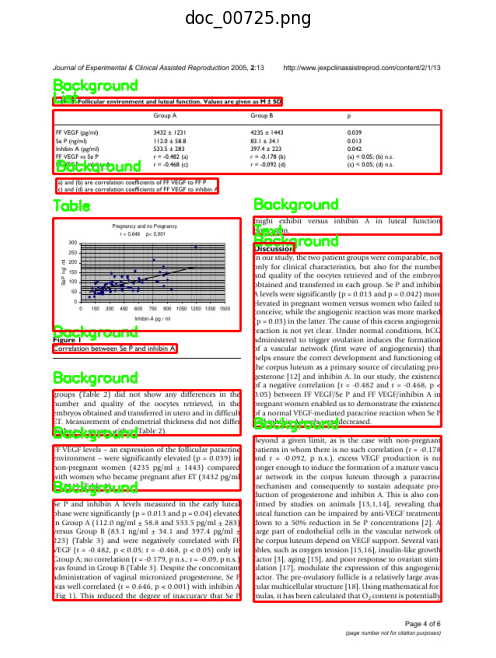

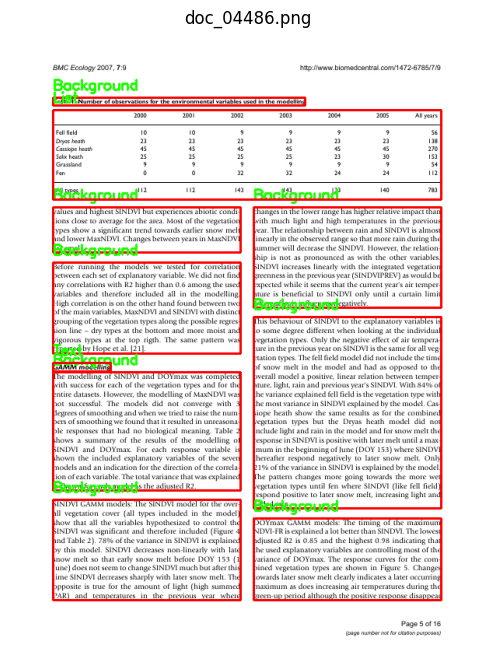

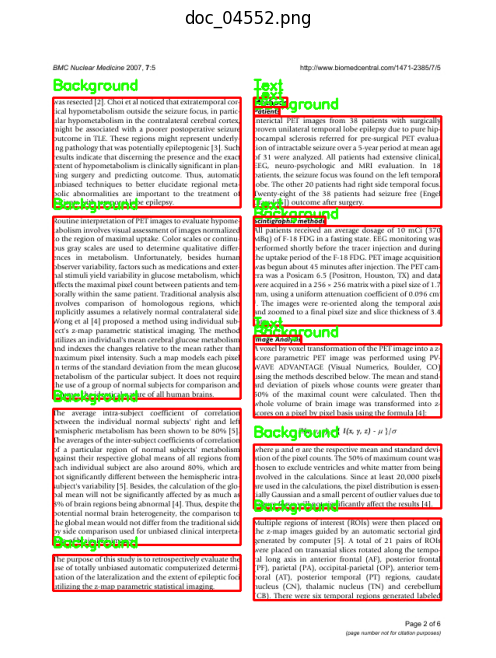

In [7]:
import random
import cv2
import json
import os
import matplotlib.pyplot as plt


directory_to_visualize = r"D:\Grand\5\train_PS05\train" 

def visualize_samples_from_directory(directory_path, num_samples=10):
		"""
		Visualizes random samples from a directory containing image and JSON pairs.

		Args:
				directory_path (str): The path to the directory with the files.
				num_samples (int): The number of random samples to visualize.
		"""
		# 1. Find all image and json files in the directory
		all_files = os.listdir(directory_path)
		image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]
		
		# 2. Create pairs of image and json paths
		pairs = []
		for img_file in image_files:
				base_name = os.path.splitext(img_file)[0]
				json_file = f"{base_name}.json"
				if json_file in all_files:
						img_path = os.path.join(directory_path, img_file)
						json_path = os.path.join(directory_path, json_file)
						pairs.append((img_path, json_path))

		if not pairs:
				print(f"No image and JSON pairs found in directory: {directory_path}")
				return

		# 3. Sample the pairs and visualize
		samples = random.sample(pairs, min(num_samples, len(pairs)))
		class_map = {0: "Background", 1: "Text", 2: "Title", 3: "List", 4: "Table", 5: "Figure"}

		for img_path, json_path in samples:
				img = cv2.imread(img_path)
				if img is None:
						print(f"Skipping {img_path} - unable to load image")
						continue

				img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

				with open(json_path, 'r') as f:
						data = json.load(f)

				for ann in data.get("annotations", []):
						x, y, bw, bh = ann["bbox"]
						class_id = ann.get("category_id", 0) - 1
						class_name = class_map.get(class_id, "Unknown")

						# Draw rectangle
						x1, y1, x2, y2 = int(x), int(y), int(x + bw), int(y + bh)
						cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

						# Put class label
						cv2.putText(img_rgb, class_name, (x1, max(20, y1 - 10)),
												cv2.FONT_HERSHEY_SIMPLEX, 0.6, (29, 255, 0), 2)

				plt.figure(figsize=(8, 8))
				plt.imshow(img_rgb)
				plt.title(os.path.basename(img_path))
				plt.axis("off")
				plt.show()



print(f"\nVisualizing 10 random samples from directory: {directory_to_visualize}...")
visualize_samples_from_directory(directory_to_visualize, num_samples=10)

## Training utility 

Split dataset into 3 parts 70 10 20 

In [13]:
import os
import shutil
import random

source_dir = r"D:\Grand\5\train_PS05\train" 

def split_dataset(source_directory):
	"""
	Splits an image/JSON dataset into train, validation, and test sets.

	Args:
		source_directory (str): The path to the directory containing the original
								image and JSON files.
	"""
	# Define split percentages
	train_split = 0.70
	val_split = 0.10
	test_split = 0.20

	for root, dirs, files in os.walk('yoloDir'):
		for f in files:
			os.unlink(os.path.join(root, f))
		for d in dirs:
			shutil.rmtree(os.path.join(root, d))

	# Define the output directory structure
	output_dir = "yoloDir"
	train_dir = os.path.join(output_dir, "train")
	val_dir = os.path.join(output_dir, "val")
	test_dir = os.path.join(output_dir, "test")

	# Create directories if they don't exist
	os.makedirs(train_dir, exist_ok=True)
	os.makedirs(val_dir, exist_ok=True)
	os.makedirs(test_dir, exist_ok=True)

	# Find all image and JSON pairs
	pairs = []
	all_files = os.listdir(source_directory)
	image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]
	
	for img_file in image_files:
		base_name = os.path.splitext(img_file)[0]
		json_file = f"{base_name}.json"
		if json_file in all_files:
			pairs.append((img_file, json_file))
			
	if not pairs:
		print(f"No matching image and JSON pairs found in {source_directory}.")
		return

	print(f"Found {len(pairs)} image/JSON pairs.")

	# Randomly shuffle the pairs for a fair split
	random.shuffle(pairs)

	# Calculate the number of files for each split
	num_pairs = len(pairs)
	num_train = int(num_pairs * train_split)
	num_val = int(num_pairs * val_split)
	
	# The rest go to the test set to account for any rounding
	num_test = num_pairs - num_train - num_val

	# Split the pairs list
	train_pairs = pairs[:num_train]
	val_pairs = pairs[num_train:num_train + num_val]
	test_pairs = pairs[num_train + num_val:]

	def copy_files(file_pairs, destination):
		"""Helper function to copy pairs of files."""
		for img_file, json_file in file_pairs:
			src_img = os.path.join(source_directory, img_file)
			src_json = os.path.join(source_directory, json_file)
			
			dest_img = os.path.join(destination, img_file)
			dest_json = os.path.join(destination, json_file)
			
			shutil.copy2(src_img, dest_img)
			shutil.copy2(src_json, dest_json)

	print(f"\nCopying {len(train_pairs)} pairs to '{train_dir}'...")
	copy_files(train_pairs, train_dir)

	print(f"Copying {len(val_pairs)} pairs to '{val_dir}'...")
	copy_files(val_pairs, val_dir)

	print(f"Copying {len(test_pairs)} pairs to '{test_dir}'...")
	copy_files(test_pairs, test_dir)

	print("\nDataset split and copying complete!")

# Example usage:
# Replace 'your_source_directory' with the path to your folder containing the files

split_dataset(source_dir)


Found 4000 image/JSON pairs.

Copying 2800 pairs to 'yoloDir\train'...
Copying 400 pairs to 'yoloDir\val'...
Copying 800 pairs to 'yoloDir\test'...

Dataset split and copying complete!


In [14]:
directory_path = 'yoloDir/test'

# Count the number of files
num_files = len([file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))])

print(f"Number of files in the directory: {num_files}")

Number of files in the directory: 1600


## Now convert the data to YOLO format and prepare dataset

In [15]:
import os
import json
import cv2

YOLO_DATASET = "yoloDir"
# Class map for your dataset. This must match the category_id in your JSON files.
# It's important that this is in the same order as your model expects.
CLASS_MAP = {
    0: "Background",
    1: "Text",
    2: "Title",
    3: "List",
    4: "Table",
    5: "Figure"
}

def convert_json_to_yolo(json_path, img_path, label_out):
    """
    Converts a single JSON annotation file to YOLO format.

    Args:
        json_path (str): Path to the input JSON file.
        img_path (str): Path to the corresponding image file.
        label_out (str): Path where the YOLO label file (.txt) will be saved.
    """
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image at {img_path}")
        return

    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: JSON file not found at {json_path}")
        return

    h, w = img.shape[:2]
    lines = []

    for ann in data.get("annotations", []):
        x, y, bw, bh = ann["bbox"]
        category_id = ann.get("category_id", 0)

        # Skip if the category ID is not in the class map or is 0
        if category_id not in CLASS_MAP:
            print(f"Warning: Category ID {category_id} not in class map for {os.path.basename(json_path)}. Skipping annotation.")
            continue
        
        # In YOLO format, class index starts from 0, so we subtract 1.
        # Ensure your class map is consistent with the `category_id` from your JSON.
        class_index = list(CLASS_MAP.keys()).index(category_id)

        # Convert bounding box to YOLO format (center_x, center_y, width, height)
        # and normalize by image width and height.
        xc = (x + bw / 2) / w
        yc = (y + bh / 2) / h
        bw_norm = bw / w
        bh_norm = bh / h
        
        # Check for invalid values before writing
        if 0 <= xc <= 1 and 0 <= yc <= 1 and 0 <= bw_norm <= 1 and 0 <= bh_norm <= 1:
            lines.append(f"{class_index} {xc:.6f} {yc:.6f} {bw_norm:.6f} {bh_norm:.6f}")
        else:
            print(f"Warning: Invalid YOLO coordinates for annotation in {os.path.basename(json_path)}. Skipping.")

    with open(label_out, "w") as f:
        f.write("\n".join(lines))


# Define the splits to process
splits = ["train", "val", "test"]

for split in splits:
    print(f"\nConverting {split} set...")
    source_dir = os.path.join(YOLO_DATASET, split)
    
    # Get a list of all files in the source directory
    all_files = os.listdir(source_dir)
    
    # Filter for image files
    image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]
    
    if not image_files:
        print(f"No image files found in {source_dir}. Skipping.")
        continue

    for img_file in image_files:
        base_name = os.path.splitext(img_file)[0]
        json_file = f"{base_name}.json"

        # Check if the corresponding JSON file exists
        if json_file in all_files:
            json_path = os.path.join(source_dir, json_file)
            img_path = os.path.join(source_dir, img_file)
            label_out_path = os.path.join(source_dir, f"{base_name}.txt")

            convert_json_to_yolo(json_path, img_path, label_out_path)
        else:
            print(f"Warning: No matching JSON file found for {img_file}. Skipping.")

print("\nAll conversions complete!")



Converting train set...

Converting val set...

Converting test set...

All conversions complete!


In [16]:
directory_path = 'yoloDir/test'

# Count the number of files
num_files = len([file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))])

print(f"Number of files in the directory: {num_files}")

Number of files in the directory: 2400


# Training

In [ ]:
import os
import torch
import yaml
from ultralytics import YOLO
from ultralytics.nn.tasks import DetectionModel
torch.serialization.add_safe_globals([DetectionModel])


# --- Configuration ---
# Automatically set the device to use. 'cuda' for GPU if available, otherwise 'cpu'.
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
epochs = 15 # Number of training epochs. Adjust this as needed.
imgsz = 640 # Image size for training. 640 is a common size.
yolomodel = "yolo11n"
batch_size = 16

# Your dataset directory structure is expected to be:
# /yoloDir
#   /train
#   /val
#   /test
#   - images and labels for each split are in the same directory.
data_dir = "yoloDir"

# Your class names. The order must match the class indices in your .txt files.
class_names = [
    "Background",
    "Text",
    "Title",
    "List",
    "Table",
    "Figure"
]
nc = len(class_names) # Number of classes, which is 6.

# Ultralytics needs a dictionary to know where the data is located.
data_config = {
    'path': data_dir,
    'train': 'train',
    'val': 'val',
    'test': 'test',
    'names': class_names
}

# --- YAML File Generation ---
# Name of the YAML file to be created.
yaml_file_path = os.path.join(data_dir, 'data.yaml')

# Write the dictionary to a YAML file.
try:
    with open(yaml_file_path, 'w') as f:
        yaml.dump(data_config, f)
    print(f"Dataset configuration file '{yaml_file_path}' created successfully.")
except Exception as e:
    print(f"Error creating YAML file: {e}")
    exit() # Exit the script if the file can't be created.


# --- Model Training ---
print(f"Using device: {device}")
try:
    # Load the pretrained YOLOv11-medium model.
    model = YOLO(yolomodel)
    
    # Move the model to the specified device.
    model.to(device)

    print("Starting training...")
    # Pass the path to the newly created YAML file to the `data` argument.
    results = model.train(
        data=yaml_file_path, 
        epochs=epochs, 
        imgsz=imgsz,
        device=device,
        batch=batch_size
    )

    print("\nTraining completed successfully!")
    print(f"Results are saved to: {model.trainer.save_dir}")

except Exception as e:
    print(f"An error occurred during training: {e}")
    # You might also want to delete the generated YAML file here for cleanup.
    # os.remove(yaml_file_path)

Dataset configuration file 'yoloDir\data.yaml' created successfully.
Using device: cuda:0
Starting training...
New https://pypi.org/project/ultralytics/8.3.192 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.191  Python-3.12.11 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yoloDir\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, m

# TESTING

In [ ]:
import os
import yaml
import json
import torch
from ultralytics import YOLO

# --- Configuration ---
# Automatically set the device to use. 'cuda' for GPU if available, otherwise 'cpu'.
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Path to your dataset directory.
data_dir = "yoloDir"

# Path to the best trained model.
# NOTE: You will need to update this path to where your model is saved,
# for example: 'runs/train/exp/weights/best.pt'
model_path = 'runs/detect/train8/weights/best.pt'

# Directory to save the converted JSON results.
results_dir = 'results'

# Your class names. The order must match the training script.
class_names = [
    "Background",
    "Text",
    "Title",
    "List",
    "Table",
    "Figure"
]


# --- YAML File Generation ---
# Name of the YAML file to be created.
yaml_file_path = os.path.join(data_dir, 'data.yaml')

try:
    with open(yaml_file_path, 'w') as f:
        yaml.dump(data_config, f)
    print(f"Dataset configuration file '{yaml_file_path}' created successfully.")
except Exception as e:
    print(f"Error creating YAML file: {e}")
    exit() # Exit the script if the file can't be created.
    
# --- Setup ---
print(f"Using device: {device}")

# Create the results directory if it doesn't exist
os.makedirs(results_dir, exist_ok=True)

# Load the trained model
try:
    print(f"Loading model from: {model_path}")
    model = YOLO(model_path)
    model.to(device)
except Exception as e:
    print(f"Error loading model. Please check the model path: {e}")
    exit()

# --- Evaluation on Test Set ---
# This will calculate metrics like mAP on the test split.
print("\n--- Performing Evaluation on Test Set ---")
try:
    # Use split='test' to force evaluation on the test set defined in data.yaml.
    metrics = model.val(data=os.path.join(data_dir, 'data.yaml'), split='test')
    
    print("\nEvaluation completed. Key metrics:")
    print(f"mAP50-95: {metrics.box.map}")
    print(f"mAP50: {metrics.box.map50}")
    print(f"mAP75: {metrics.box.map75}")

except Exception as e:
    print(f"An error occurred during evaluation: {e}")

# --- Prediction and JSON Export ---
print("\n--- Performing Predictions and Exporting to JSON ---")
try:
    # Get the list of test images. The images are directly in the 'test' folder.
    test_images_dir = os.path.join(data_dir, 'test')
    if not os.path.exists(test_images_dir):
        print(f"Error: Test images directory not found at {test_images_dir}")
        exit()

    # Predict on the test set
    # The 'stream=True' argument is used for efficiency on large datasets.
    results = model.predict(source=test_images_dir, save=False, conf=0.25, iou=0.45, stream=True)

    # Process and export each result to JSON
    for r in results:
        file_name = os.path.basename(r.path)
        img_width, img_height = r.orig_shape

        annotations = []
        if r.boxes and len(r.boxes.data) > 0:
            for box in r.boxes:
                # Get the bounding box in xywh format (normalized)
                x_center_norm, y_center_norm, w_norm, h_norm = box.xywhn.squeeze().tolist()
                
                # Convert to pixel coordinates (xywh)
                x_center = x_center_norm * img_width
                y_center = y_center_norm * img_height
                width = w_norm * img_width
                height = h_norm * img_height

                # Get class ID and name
                class_id = int(box.cls)
                category_name = class_names[class_id]
                
                # Create the annotation dictionary
                annotations.append({
                    "bbox": [x_center, y_center, width, height],
                    "category_id": class_id,
                    "category_name": category_name
                })

        # Create the final JSON object
        json_data = {
            "file_name": file_name,
            "annotations": annotations,
            "corruption": {
                "type": "none",
                "severity": 0
            }
        }

        # Save the JSON file
        json_file_path = os.path.join(results_dir, os.path.splitext(file_name)[0] + '.json')
        with open(json_file_path, 'w') as f:
            json.dump(json_data, f, indent=2)
        print(f"Exported prediction for {file_name} to {json_file_path}")

    print("\nAll predictions converted and exported successfully!")

except Exception as e:
    print(f"An error occurred during prediction or export: {e}")


Dataset configuration file 'yoloDir\data.yaml' created successfully.
Using device: cuda:0
Loading model from: runs/detect/train8/weights/best.pt

--- Performing Evaluation on Test Set ---
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 720.093.0 MB/s, size: 207.2 KB)
val: Scanning D:\Grand\5\Solution\yoloDir\test... 800 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 800/800 359.4it/s 2.2s0.1s
val: D:\Grand\5\Solution\yoloDir\test\doc_00445.png: 1 duplicate labels removed
val: D:\Grand\5\Solution\yoloDir\test\doc_03563.png: 1 duplicate labels removed
val: New cache created: D:\Grand\5\Solution\yoloDir\test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 50/50 3.4it/s 14.5s0.3s
                   all        800       8073      0.946      0.951      0.959      0.896
                  Text        799       5783       0.98      0.971      